<a href="https://colab.research.google.com/github/raghupriya099/CNNTrafficSignClassification/blob/main/TafficSignClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/datasets/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark    641568792  2018-11-25 18:12:34.427000         152189       1237  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                          4471088826  2019-08-31 18:22:11.850000          18671        316  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                          123621493  2023-07-11 04:21:24.180000           2669         37  1.0

In [ ]:
!mkdir traffic_sign_datasets
%cd traffic_sign_datasets

/content/traffic_sign_datasets


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 601M/612M [00:01<00:00, 296MB/s]
100% 612M/612M [00:01<00:00, 401MB/s]
/content


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('traffic_sign_datasets/gtsrb-german-traffic-sign.zip','r')
zip_ref.extractall('traffic_sign_datasets')
zip_ref.close()

In [ ]:
!rm /content/traffic_sign_datasets/gtsrb-german-traffic-sign.zip

In [ ]:
!rm -rf /content/traffic_sign_datasets/train
!rm -rf /content/traffic_sign_datasets/test
!rm -rf /content/traffic_sign_datasets/meta
!rm /content/traffic_sign_datasets/Meta.csv
!rm -rf /content/traffic_sign_datasets/Meta

In [ ]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split


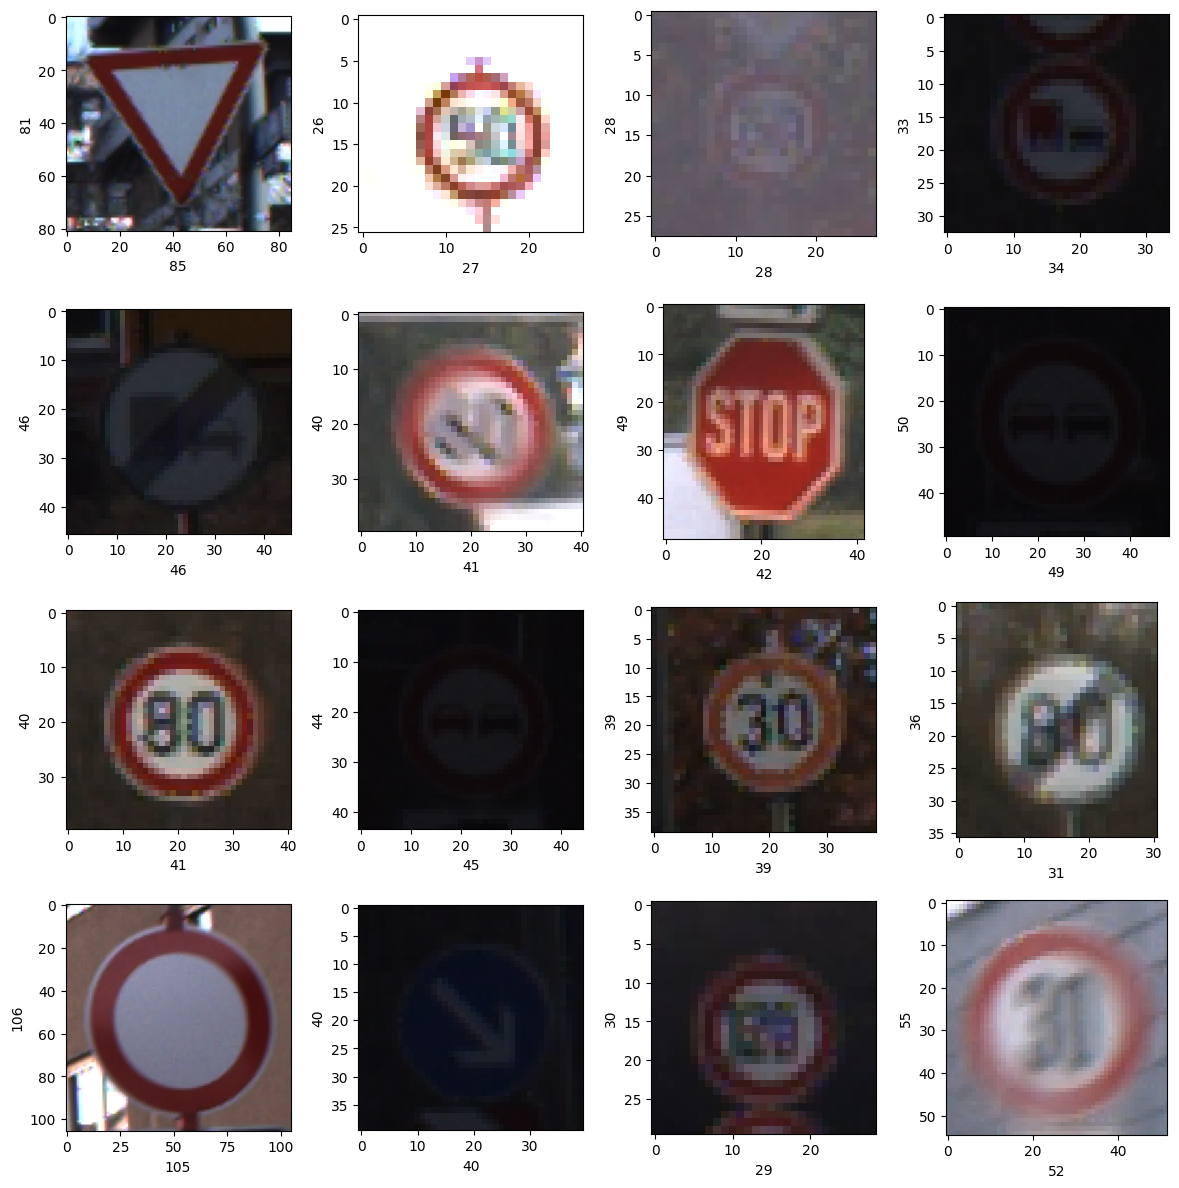

In [ ]:
# Visualizing few traffic sign images from test dataset and we can see here that dimensions of images are uneven
plt.figure(figsize=(12,12))
path = 'traffic_sign_datasets/Test'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(os.path.join(path,random.choice(sorted(os.listdir(path)))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)


In [ ]:
len(tf.keras.utils.image_dataset_from_directory('/content/traffic_sign_datasets/Train').class_names)

Found 39209 files belonging to 43 classes.


43

In [ ]:
# For further processing of data we require dimensions to be equal, so we will take mean of dimensions
dim1 = []
dim2 = []

for i in range(0, 43):
  labels = '/content/traffic_sign_datasets/Train/' + '/{0}'.format(i)
  for j in os.listdir(labels):
    im = imread(labels + '/' + j)
    dim1.append(im.shape[0])
    dim2.append(im.shape[1])


In [ ]:
#os.listdir('/content/traffic_sign_datasets/Train/0')
import cv2
imread('/content/traffic_sign_datasets/Train/0/00000_00004_00027.png').shape

(100, 95, 3)

In [ ]:
# Printing mean dimensions of training data
print(f'Dimension 1 Mean: {np.mean(dim1)}, Dimension 2 Mean: {np.mean(dim2)}')

Dimension 1 Mean: 50.328929582493814, Dimension 2 Mean: 50.83587951745773


In [ ]:
# Now reshape image to (50, 50)
images = []
label_id = []

for i in range(43):
  labels = '/content/traffic_sign_datasets/Train/' + '{0}'.format(i)
  for j in os.listdir(labels):
    img = Image.open(labels + '/' + j)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [ ]:
#Converting images to numpy array and normalizing them
images = np.array(images)
images = images/255

In [ ]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [ ]:
images.shape

(39209, 50, 50, 3)

In [ ]:
#Visualize the number of classes count
label_count = pd.DataFrame(label_id).value_counts()
label_count.sort_values
label_count

In [ ]:
# Spliting data into training and validation data
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=42)

In [ ]:
# Keras has a built-in fuction for one-hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,063,787 (7.87 MB)

 Trainable params: 2,063,787 (7.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size = 128, validation_data=(x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 20s - 80ms/step - accuracy: 0.3731 - loss: 2.2940 - val_accuracy: 0.7809 - val_loss: 0.9624
Epoch 2/10
246/246 - 8s - 34ms/step - accuracy: 0.7054 - loss: 0.9324 - val_accuracy: 0.9415 - val_loss: 0.3269
Epoch 3/10
246/246 - 5s - 22ms/step - accuracy: 0.8040 - loss: 0.5996 - val_accuracy: 0.9637 - val_loss: 0.1867
Epoch 4/10
246/246 - 10s - 42ms/step - accuracy: 0.8477 - loss: 0.4623 - val_accuracy: 0.9700 - val_loss: 0.1328
Epoch 5/10
246/246 - 10s - 41ms/step - accuracy: 0.8728 - loss: 0.3849 - val_accuracy: 0.9770 - val_loss: 0.1130
Epoch 6/10
246/246 - 5s - 21ms/step - accuracy: 0.8903 - loss: 0.3290 - val_accuracy: 0.9814 - val_loss: 0.0857
Epoch 7/10
246/246 - 11s - 43ms/step - accuracy: 0.9022 - loss: 0.2892 - val_accuracy: 0.9827 - val_loss: 0.0671
Epoch 8/10
246/246 - 10s - 41ms/step - accuracy: 0.9119 - loss: 0.2554 - val_accuracy: 0.9841 - val_loss: 0.0658
Epoch 9/10
246/246 - 5s - 22ms/step - accuracy: 0.9170 - loss: 0.2442 - val_accuracy: 0.9855 - val_

<Axes: >

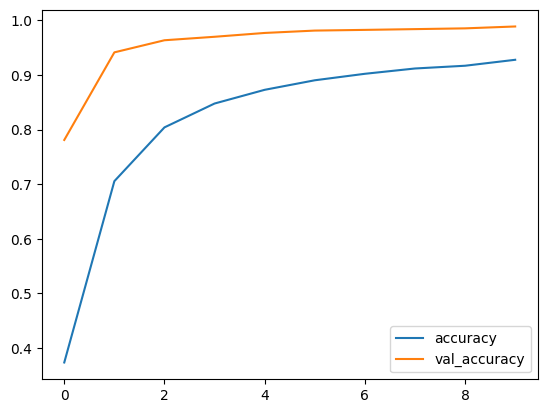

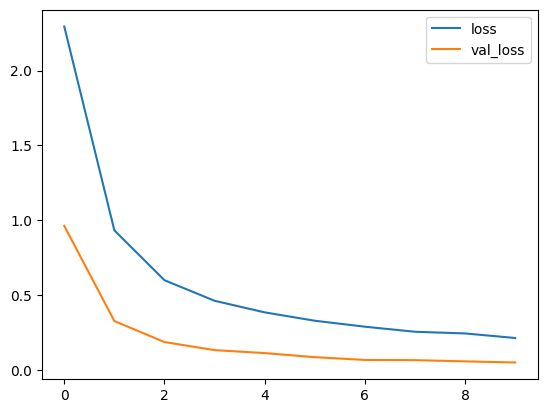

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

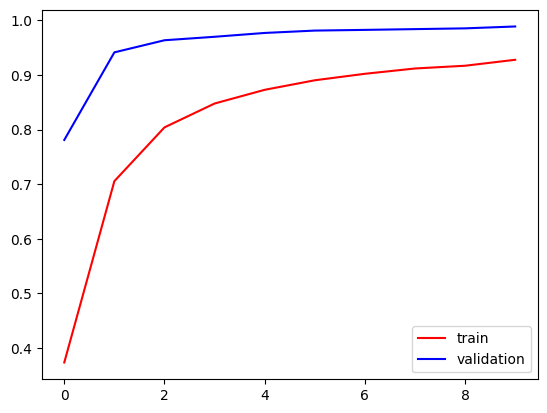

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'],color='red',label='train')
plt.plot(model.history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

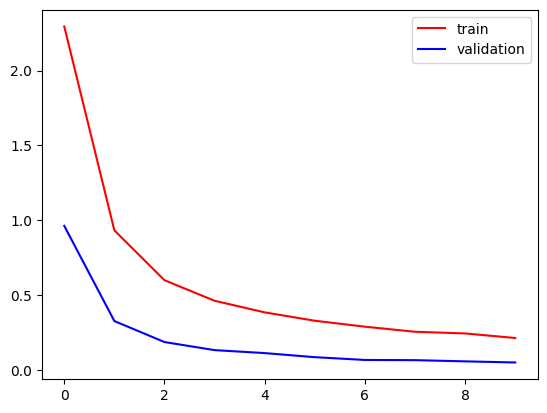

In [ ]:
plt.plot(model.history.history['loss'],color='red',label='train')
plt.plot(model.history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Testing data

In [ ]:
test_path = '/content/traffic_sign_datasets/Test'
%cd /content/traffic_sign_datasets/Test

/content/traffic_sign_datasets/Test


In [ ]:
!rm GT-final_test.csv

In [ ]:
%cd ..

/content/traffic_sign_datasets


In [ ]:
%cd /content/traffic_sign_datasets/Test
#!ls

In [ ]:
# Defining a function that will scale images
def scaling(test_images, test_path):
  images = []

  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

  #Converting images into numpy array
  images = np.array(images)
  images= images/255.0

  return images

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)), test_path)

In [ ]:
test = pd.read_csv('/content/traffic_sign_datasets/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
y_test.shape

(12630,)

In [ ]:
y_pred = np.argmax(model.predict(test_images), axis = -1)
y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([16,  1, 38, ..., 32,  7, 10])

In [ ]:
print(y_pred.shape)

(12630,)


In [ ]:
# Storing all labels
all_labels = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)', 'No passing', 'No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles',
              'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left',
              'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
              'Road work', 'Taffic signals', 'Pedestrians', 'Children crossing', 'Bicycle crossing', 'Beware of ice/snow',
              'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only',
              'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory',
              'End of no passing', 'End of no passing by vechiles over 3.5 metric tons']

In [ ]:
len(all_labels)

43

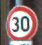

In [ ]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [ ]:
# Original label
print('Original label : ', all_labels[y_test[1]])

Original label :  Speed limit (30km/h)


In [ ]:
# Predicted label
print('Predicted label : ', all_labels[y_pred[1]])

Predicted label :  Speed limit (30km/h)


# Conclusion

We started with downloading the dataset, preprocessing it, created the model and found out the predictions using the model. During preprocessing we found that this dataset has 43 classes. Model reached an accuracy of 95%+ in just 10 epochs, we can further optimize the model using hyper parameter tuning and reach a higher accuracy

# Scope

This model can be used in self driving cars which will enable them to automatically recognize traffic signs similarly the driver alert system inside cars will help and protect drivers by understanding the traffic signs around them